In [ ]:
#Modelo de Machine Learning de Classificação
# GRUPO : João Victor 




In [191]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.linear_model import LogisticRegression


In [90]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [91]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [92]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


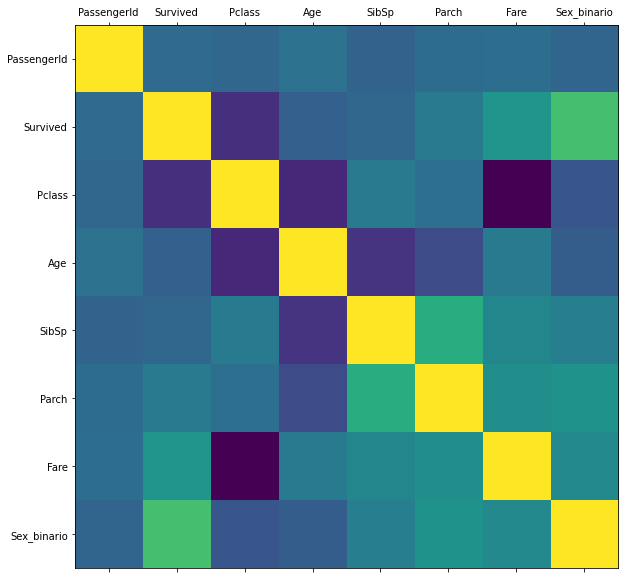

In [179]:
def plot_corr(train, size=10):
    corr = train.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns) 
plot_corr(train)

In [110]:
variaveis = ['Sex_binario', 'Age']


In [111]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [126]:
def transformar_sexo(valor):
    if valor == 'female':
        return 1
    else:
        return 0
    
train['Sex_binario'] = train['Sex'].map(transformar_sexo)

In [127]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [128]:
variaveis = ['Sex_binario', 'Age']


In [129]:
X = train[variaveis]
y = train['Survived']
X = X.fillna(-1)

In [130]:
modelo.fit(X, y)


RandomForestClassifier(n_jobs=-1, random_state=0)

In [131]:
X = X.fillna(-1)


In [132]:
X_prev = test[variaveis]


In [133]:
test['Sex_binario'] = test['Sex'].map(transformar_sexo)


In [134]:
X_prev = test[variaveis]
X_prev = X_prev.fillna(-1)
X_prev.head()


,Sex_binario,Age
0,0,34.5
1,1,47.0
2,0,62.0
3,0,27.0
4,1,22.0


In [136]:
plano_previsto = modelo.predict(X_prev)
plano_previsto

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [146]:
from sklearn.neighbors import KNeighborsClassifier
classificador_vizinho = KNeighborsClassifier(5)
classificador_vizinho.fit(X, y)

KNeighborsClassifier()

In [153]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [154]:
skfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=0)

In [155]:
from sklearn.model_selection import GridSearchCV

In [156]:
params = {'n_neighbors': [5]}

In [157]:
gs = GridSearchCV(estimator=KNeighborsClassifier(), param_grid= params, cv=skfold, 
                  verbose=1, scoring='accuracy', return_train_score=True)from sklearn.model_selection import GridSearchCV

In [158]:
gs.fit(X,y)

Fitting 100 folds for each of 1 candidates, totalling 100 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=10, random_state=0),
             estimator=KNeighborsClassifier(), param_grid={'n_neighbors': [5]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [159]:
gs.cv_results_['mean_test_score']

array([0.74601498])

In [184]:
modelo_NB = GaussianNB()
modelo_NB.fit(X, y)

GaussianNB()

In [187]:
print("Predicao para o conjunto de treinamento")
y_pred_treino = modelo_NB.predict(X)
print("Acuracia para o conjunto de treinamento")
print(accuracy_score(y, y_pred_treino))
print("Na Base de Treinamento")

Predicao para o conjunto de treinamento
Acuracia para o conjunto de treinamento
0.7867564534231201
Na Base de Treinamento


In [195]:
modelo_v3 = LogisticRegression(C = 0.7, random_state = 42)
modelo_v3.fit(X, y.ravel())
lr_predict_test = modelo_v3.predict(X)

In [200]:
print("Exatidão (Accuracy): na Base de Teste {0:.4f}".format(metrics.accuracy_score(y, lr_predict_test)))
print()
print("Classification Report")
print(metrics.classification_report(y, lr_predict_test, labels = [1, 0]))

Exatidão (Accuracy): na Base de Teste 0.7868

Classification Report
              precision    recall  f1-score   support

           1       0.74      0.68      0.71       342
           0       0.81      0.85      0.83       549

    accuracy                           0.79       891
   macro avg       0.78      0.77      0.77       891
weighted avg       0.78      0.79      0.78       891

